# **Eksploracyjna Analiza Danych: Iris Dataset**

<div style="text-align:center;">
  <img src="https://wallpapers-all.com/uploads/posts/2016-11/1_iris.jpg" style="width:100%; height:auto;">
</div> 

## **Wprowadzenie**

 Irysy (*Iris*) to rośliny ozdobne z rodziny kosaćcowatych.  
 W statystyce i uczeniu maszynowym znane są głównie z klasycznego zbioru danych „Iris dataset”, zawierającego pomiary trzech gatunków: *setosa*, *versicolor* i *virginica*.
 
<div style="display:flex; justify-content:center;">

  <div style="margin:0 20px; text-align:center;">
    <img src="https://www.plantpref.co.uk/user/products/large/irisseto2.jpg" width="200"><br><b>Iris setosa</b>
  </div>
  <div style="margin:0 20px; text-align:center;">
    <img src="https://tse1.mm.bing.net/th/id/OIP.r6IuT0Se8qJORDgsn1Dq3QHaF7?w=474&h=474&c=7&p=0" width="200"><br><b>Iris versicolor</b>
  </div>
  <div style="margin:0 20px; text-align:center;">
    <img src="https://tse1.mm.bing.net/th/id/OIP.fT4cZGpZAKUxKFHbfHY_DQHaFh?w=474&h=474&c=7&p=0" width="200"><br><b>Iris virginica</b>
  </div>
</div>

 **Iris setosa** – najmniejszy, wąskie płatki.  
 **Iris versicolor** – średniej wielkości, zmienne kolory.  
 **Iris virginica** – największy, szerokie płatki.

## **Cel analizy**  

Celem niniejszej analizy jest eksploracja klasycznego zbioru danych **Iris**, obejmującego trzy gatunki irysów (*setosa*, *versicolor* oraz *virginica*).  
Analiza ma na celu:  

- sprawdzenie struktury danych i podstawowych statystyk,  
- identyfikację wartości odstających,  
- porównanie rozkładu cech pomiędzy gatunkami,  
- wskazanie, które cechy najlepiej różnicują klasy.  


 **Jeszcze więcej o irysach**

Irysy (Iris) to rośliny z rodziny kosaćcowatych (Iridaceae). Występują naturalnie w Europie, Azji i Ameryce Północnej, a obecnie są uprawiane niemal na całym świecie jako rośliny ozdobne. Nazwa „Iris” pochodzi z greki i oznacza tęczę, co nawiązuje do bogactwa barw, w jakich kwitną te kwiaty.

**Rośliny te charakteryzują się:**

* kłączowym systemem korzeniowym,

* długimi, wąskimi liśćmi w kształcie miecza,

* efektownymi kwiatami o zróżnicowanej kolorystyce.

W botanice wyróżnia się ponad 200 gatunków irysów, jednak w statystyce i uczeniu maszynowym szczególną rolę odgrywają trzy: Iris setosa, Iris versicolor i Iris virginica. To właśnie ich pomiary (długości i szerokości działek kielicha oraz płatków) zostały wykorzystane przez Ronald A. Fishera w 1936 roku do zilustrowania metod analizy dyskryminacyjnej. Od tego czasu tzw. „Iris dataset” stał się jednym z najczęściej używanych i najpopularniejszych zbiorów danych w dydaktyce statystyki, eksploracji danych i uczenia maszynowego.

## **1. Dane wejściowe**

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

**Kolumny:**
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

## **2. Analiza wstępna** 
### ***Ogólny przegląd danych***

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("25__iris.csv")

In [4]:
import warnings

# Wycisz wszystkie FutureWarning (np. z pandas, seaborn)
warnings.simplefilter(action="ignore", category=FutureWarning)

# Wycisz wszystkie UserWarning z seaborn
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")


#### **Podgląd pierwszych 5 wierszy**

In [5]:
print("Przykładowe dane:\n")
display(df.head())

Przykładowe dane:



,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Dane wczytały się poprawnie. W zbiorze widzimy pięć pierwszych obserwacji, które należą do gatunku *Iris-setosa*.  
Każdy wiersz odpowiada pojedynczemu kwiatowi i zawiera pomiary czterech cech (długość i szerokość działki kielicha oraz płatka) wyrażone w centymetrach.  
Wartości wyglądają realistycznie i spójnie (np. długości płatków są mniejsze od długości kielicha).

#### **Informacje o strukturze danych**

In [6]:
print("\nInformacje o DataFrame:\n")
print(df.info())


Informacje o DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Dane zawierają 150 wierszy i 5 kolumn.
Cztery kolumny z pomiarami (długość i szerokość kielicha oraz płatka) mają typ float64, a kolumna class jest typu object (przechowuje nazwy gatunków).
Każda kolumna ma 150 niepustych wartości, co oznacza, że zbiór jest kompletny — nie występują braki danych.

#### **Statystyki opisowe**

In [7]:
print()
display(df.describe().round(2))

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Wszystkie cechy mają po 150 obserwacji, więc zbiór jest kompletny.
Średnia długość kielicha to ok. 5.8 cm, a średnia szerokość ok. 3.0 cm.
Długość płatka ma średnią 3.76 cm, przy czym zakres wartości (od 1.0 do 6.9 cm) i wysokie odchylenie standardowe (1.76) sugerują, że ta cecha będzie istotna w rozróżnianiu gatunków.
Szerokość płatka waha się od 0.1 do 2.5 cm — również cecha z dużym zróżnicowaniem między gatunkami.

#### **Sprawdzenie braków danych**

In [8]:
print("\nLiczba brakujących wartości w każdej kolumnie:\n")
print(df.isnull().sum())


Liczba brakujących wartości w każdej kolumnie:

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64


W zbiorze nie występują żadne braki danych – wszystkie cechy mają komplet 150 obserwacji. Dzięki temu nie ma potrzeby stosowania metod imputacji czy uzupełniania wartości. Zbiór jest czysty i gotowy do dalszej analizy eksploracyjnej.


 #### **Liczba obserwacji w każdej klasie**

In [9]:
print(df['klasa (class)'].value_counts())

klasa (class)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


W zbiorze danych znajdują się trzy klasy: Iris-setosa, Iris-versicolor i Iris-virginica. Każda z nich jest reprezentowana przez 50 obserwacji. Oznacza to, że zbiór jest idealnie zrównoważony klasowo, co jest dużą zaletą przy dalszej analizie i budowie modeli klasyfikacyjnych.

#### **Wartości unikatowe**

In [10]:
df.nunique()

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

Cechy numeryczne mają od kilkunastu do kilkudziesięciu unikalnych wartości:

* długość kielicha – 35 różnych wartości,

* szerokość kielicha – 23 wartości,

* długość płatka – 43 wartości,

* szerokość płatka – 22 wartości.

Oznacza to, że pomiary są zróżnicowane i zawierają wystarczającą ilość informacji do odróżniania gatunków.
Kolumna class ma 3 unikalne wartości, co potwierdza, że zbiór zawiera dokładnie trzy gatunki irysów (setosa, versicolor, virginica).

**Wnioski – analiza wstępna**

Zbiór danych zawiera 150 obserwacji i 5 kolumn. Wszystkie cechy numeryczne są kompletne, bez braków, a kolumna class obejmuje trzy gatunki irysów, po 50 próbek każdy. Statystyki opisowe wskazują, że największe zróżnicowanie występuje w cechach płatków (długość i szerokość), co sugeruje ich kluczową rolę w odróżnianiu gatunków. Dane są czyste, dobrze zbalansowane i gotowe do dalszej eksploracji.

## **2. Analiza uniwariantna (pojedyncze cechy)**

### **Histogramy cech**

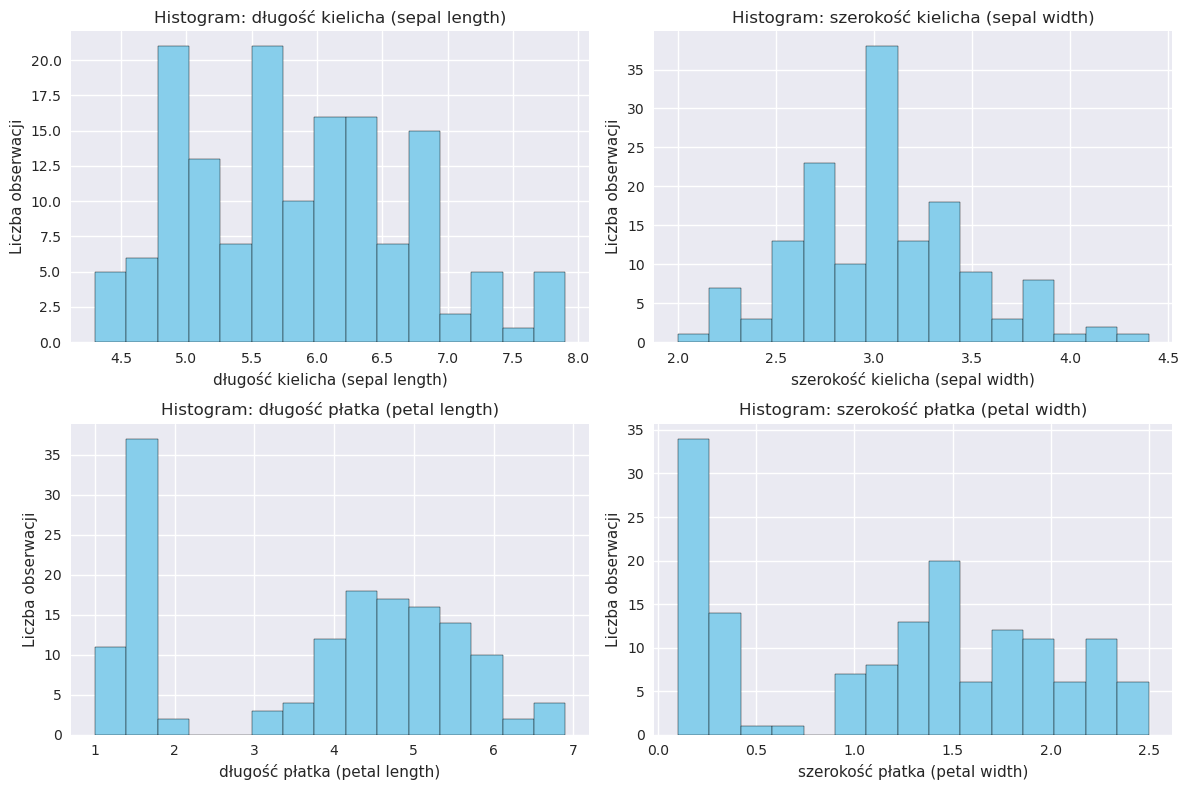

In [11]:
import matplotlib.pyplot as plt

# Ustawienia wykresów
plt.style.use("seaborn-v0_8")  
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Lista kolumn numerycznych
cols = df.columns[:-1]  # wszystkie oprócz 'class'

# Iteracja po cechach
for col, ax in zip(cols, axes.flatten()):
    ax.hist(df[col], bins=15, color="skyblue", edgecolor="black")
    ax.set_title(f"Histogram: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Liczba obserwacji")

plt.tight_layout()
plt.show()


**Histogramy pokazują rozkład wartości dla czterech cech irysów:**

* Długość kielicha (sepal length): rozkład zbliżony do normalnego, większość obserwacji w przedziale 5–6,5 cm.

* Szerokość kielicha (sepal width): skupiona wokół wartości 3 cm, kilka obserwacji odstaje poniżej 2,5 cm i powyżej 3,8 cm.

* Długość płatka (petal length): rozkład wyraźnie wielomodalny – można dostrzec trzy grupy odpowiadające trzem gatunkom irysów.

* Szerokość płatka (petal width): podobnie jak długość płatka, cecha ta mocno różnicuje gatunki – widoczne trzy wyraźne skupiska.

### **Boxploty cech**

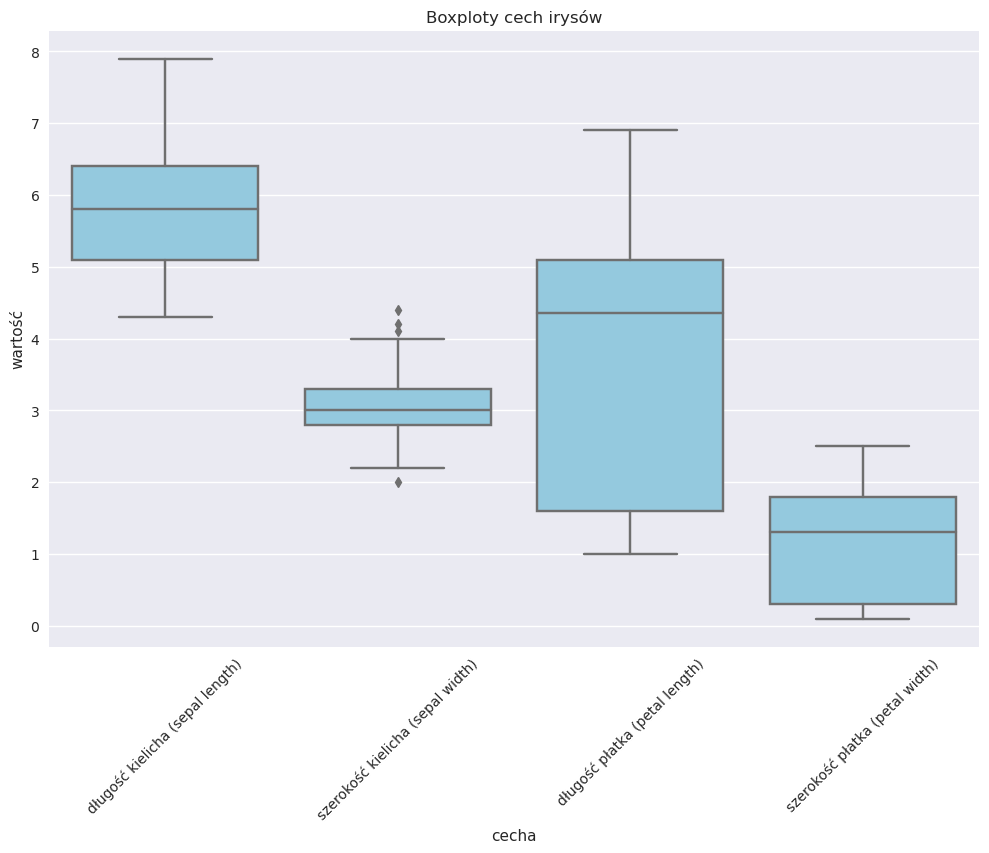

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ustawienia
plt.figure(figsize=(12, 8))

# Boxplot dla wszystkich cech numerycznych
df_melt = df.melt(id_vars="klasa (class)", var_name="cecha", value_name="wartość")

sns.boxplot(data=df_melt, x="cecha", y="wartość", color="skyblue")

plt.title("Boxploty cech irysów")
plt.xticks(rotation=45)
plt.show()


Boxploty pokazują, że długość i szerokość płatka są najbardziej zróżnicowane i będą kluczowe w rozróżnianiu gatunków. W szerokości kielicha widać pojedyncze wartości odstające.

### **Boxploty cech wg gatunku**

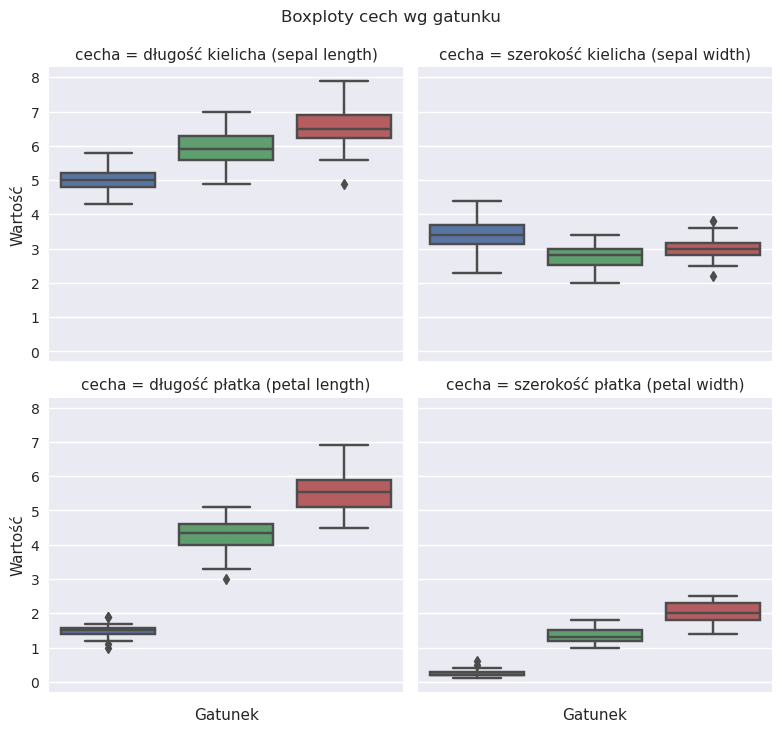

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dane w "długim" formacie
df_melt = df.melt(id_vars="klasa (class)", var_name="cecha", value_name="wartość")

# Siatka wykresów: boxploty cech wg gatunku
g = sns.catplot(
    data=df_melt,
    x="klasa (class)", y="wartość",
    col="cecha", kind="box",
    col_wrap=2, height=3.6, aspect=1.1
)

g.set_axis_labels("Gatunek", "Wartość")
g.set_xticklabels(rotation=15)
g.fig.suptitle("Boxploty cech wg gatunku", y=1.03)
plt.show()


Cechy płatków (długość, szerokość) wyraźnie separują klasy: setosa ma najmniejsze wartości, virginica największe, versicolor pośrednie.
Cechy kielicha mocno się nakładają między gatunkami — są mniej przydatne do rozróżniania.

**Wnioski – analiza uniwariantna**

Rozkłady cech pokazują, że dane są zróżnicowane i zawierają wystarczającą ilość informacji do rozróżniania gatunków. Histogramy ujawniają, że długość i szerokość płatka mają wyraźnie wielomodalny charakter, co odpowiada trzem gatunkom irysów. Boxploty potwierdzają większe zróżnicowanie wartości dla cech płatków oraz wskazują na pojedyncze wartości odstające w szerokości kielicha. Cechy płatków są najbardziej informacyjne i prawdopodobnie będą kluczowe w dalszej klasyfikacji.

## **3. Analiza wielowymiarowa (zależności między cechami)**

### **Macierz korelacji + heatmapa**

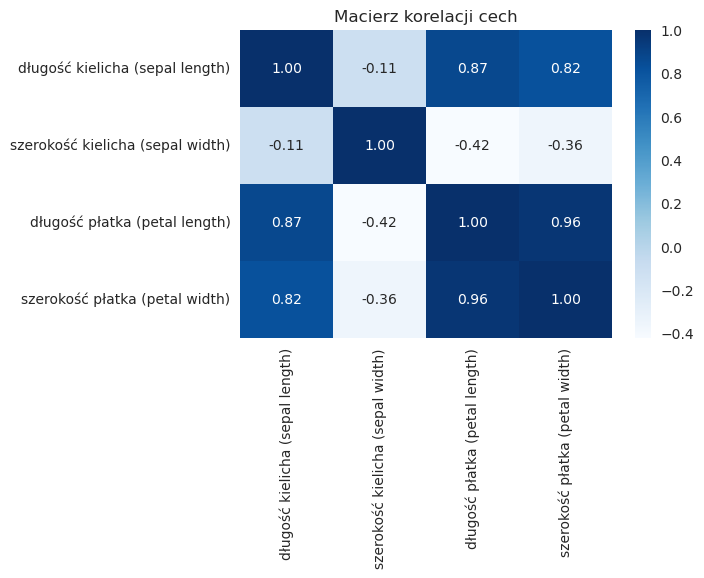

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Macierz korelacji
corr = df.iloc[:, :-1].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Macierz korelacji cech")
plt.show()


Cechy płatków są silnie ze sobą skorelowane (długość i szerokość płatka). Cechy kielicha mają słabsze korelacje z innymi zmiennymi.

### **Scatterplot**

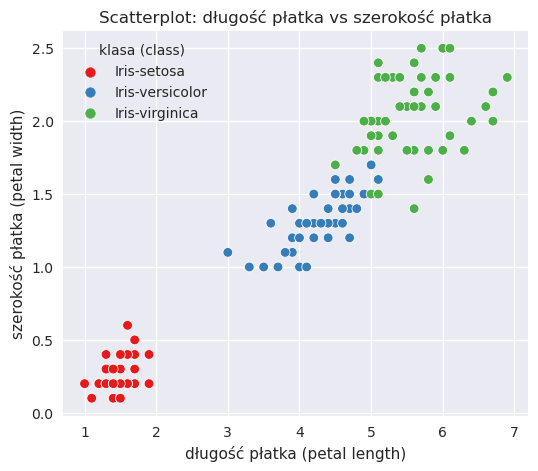

In [15]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x="długość płatka (petal length)", 
    y="szerokość płatka (petal width)", 
    hue="klasa (class)",
    palette="Set1"
)
plt.title("Scatterplot: długość płatka vs szerokość płatka")
plt.show()


Scatterplot pokazuje wyraźną separację między gatunkami na podstawie cech płatków. Setosa tworzy oddzielną grupę, versicolor i virginica częściowo się nakładają.

### **Pairplot**

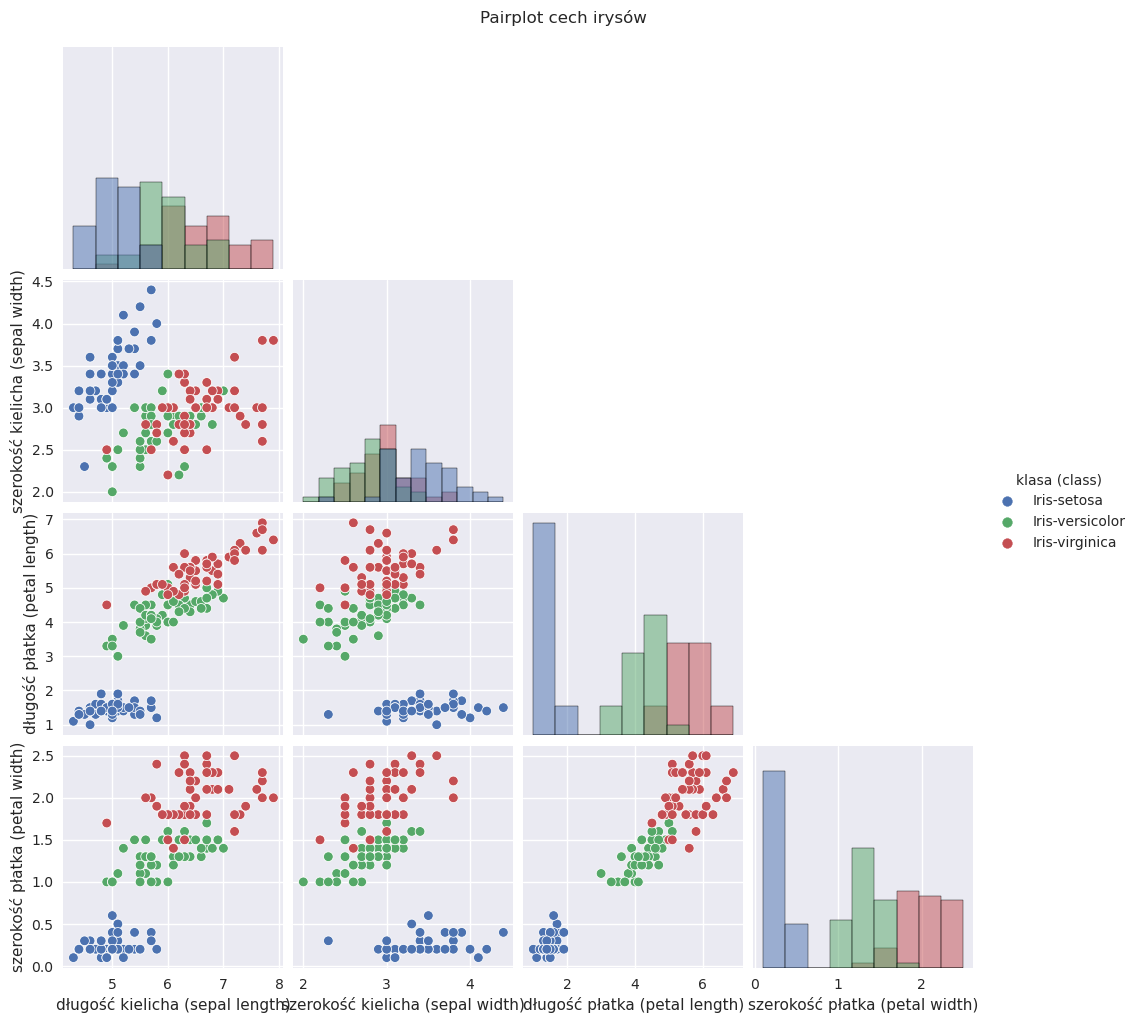

In [16]:
sns.pairplot(df, hue="klasa (class)", corner=True, diag_kind="hist")
plt.suptitle("Pairplot cech irysów", y=1.02)
plt.show()

Pairplot pozwala przejrzeć wszystkie pary cech. Najlepszą separację między klasami dają cechy płatków, natomiast cechy kielicha pokazują duże nakładanie się wartości.

**Wnioski – analiza wielowymiarowa**

Analiza wielowymiarowa pokazała, że cechy płatków (długość i szerokość) są ze sobą silnie skorelowane i najlepiej różnicują gatunki. Scatterplot i pairplot wskazują, że Iris setosa tworzy wyraźnie oddzielną grupę, podczas gdy versicolor i virginica częściowo się nakładają. Cechy kielicha (długość i szerokość) wykazują mniejsze zróżnicowanie między klasami i mają ograniczoną użyteczność w klasyfikacji. Dane dobrze nadają się do dalszych analiz i budowy modeli uczenia maszynowego.

## **4. Analiza klas (gatunków)**

### **Boxploty cech wg gatunku**

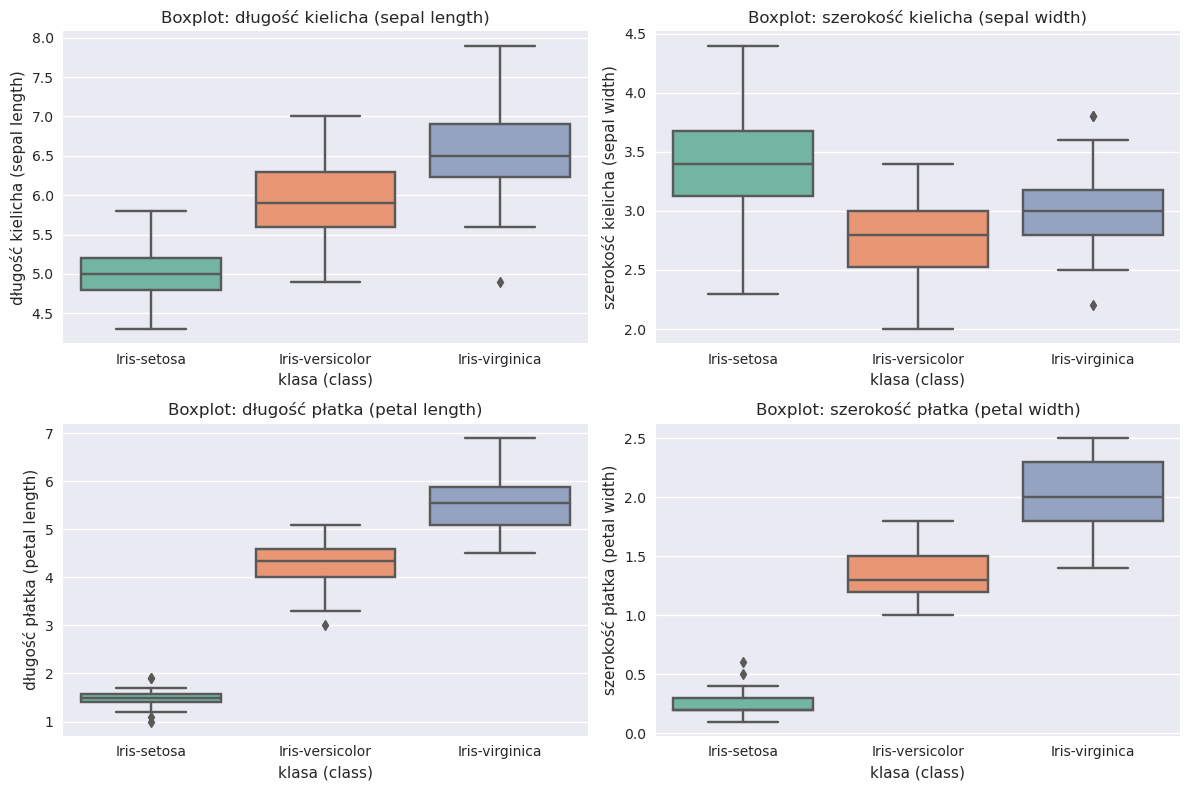

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxploty dla każdej cechy w podziale na gatunki
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

cols = df.columns[:-1]  # wszystkie cechy oprócz 'class'

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(data=df, x="klasa (class)", y=col, ax=ax, palette="Set2")
    ax.set_title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

Boxploty potwierdzają, że cechy płatków (długość i szerokość) wyraźnie odróżniają gatunki: Iris-setosa ma najmniejsze wartości, Iris-virginica największe, a Iris-versicolor znajduje się pośrodku.
Cechy kielicha (długość i szerokość) częściowo się nakładają między gatunkami, co ogranicza ich przydatność w klasyfikacji.

### **Violinploty**

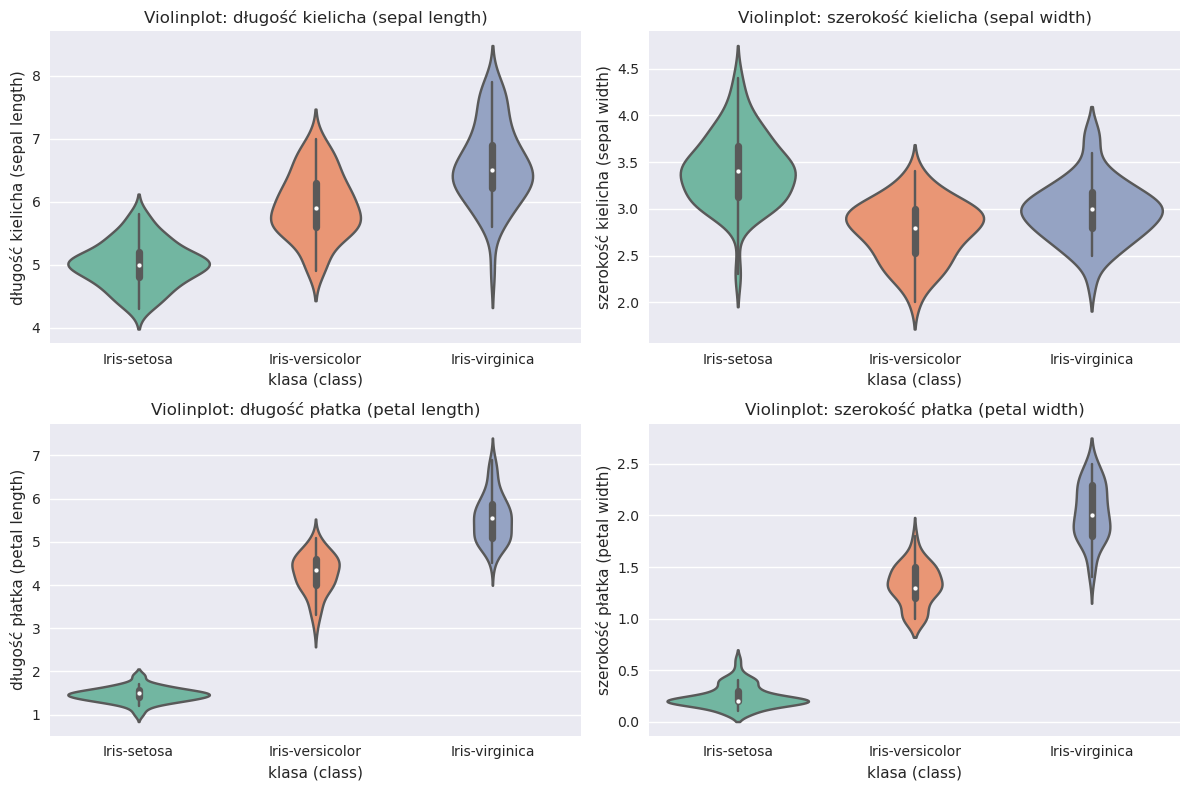

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for col, ax in zip(cols, axes.flatten()):
    sns.violinplot(data=df, x="klasa (class)", y=col, ax=ax, palette="Set2")
    ax.set_title(f"Violinplot: {col}")

plt.tight_layout()
plt.show()


**Violinploty potwierdzają wnioski z boxplotów:**

* Płatki (długość i szerokość) najlepiej rozróżniają gatunki – setosa ma najmniejsze wartości, virginica największe, a versicolor leży pośrodku. Rozkłady są dobrze rozdzielone.

* Kielichy (długość i szerokość) mają większe nakładanie się między gatunkami, przez co są mniej przydatne w klasyfikacji.

### **Porównanie średnich wartości cech**

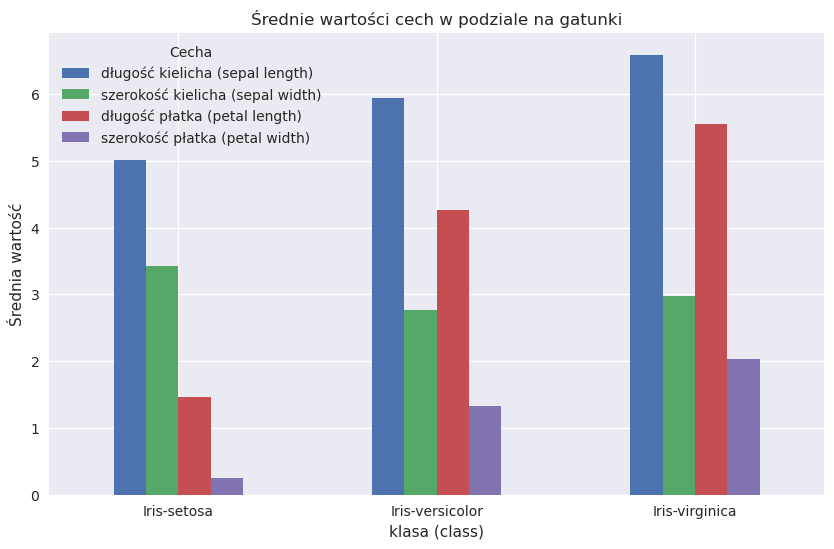

In [19]:
# Obliczamy średnie dla każdej cechy w podziale na gatunki
mean_values = df.groupby("klasa (class)").mean()

# Wykres słupkowy
mean_values.plot(kind="bar", figsize=(10,6))
plt.title("Średnie wartości cech w podziale na gatunki")
plt.ylabel("Średnia wartość")
plt.xticks(rotation=0)
plt.legend(title="Cecha")
plt.show()


**Średnie wartości cech wyraźnie różnią się pomiędzy gatunkami:**

* Iris-setosa ma najkrótsze i najwęższe płatki, ale stosunkowo szeroki kielich.

* Iris-versicolor zajmuje wartości pośrednie dla wszystkich cech.

* Iris-virginica wyróżnia się największymi płatkami oraz najdłuższym kielichem.

Widać więc, że to właśnie płatki są główną cechą odróżniającą gatunki, podczas gdy cechy kielicha mają mniejsze znaczenie w klasyfikacji.

**Wnioski – analiza klas**

Analiza klas pokazała, że cechy płatków (długość i szerokość) najlepiej odróżniają gatunki irysów – setosa ma najmniejsze wartości, virginica największe, a versicolor plasuje się pośrodku. W przypadku cech kielicha (długość i szerokość) rozkłady gatunków częściowo się nakładają, co ogranicza ich przydatność w klasyfikacji. Średnie wartości potwierdzają te obserwacje, wskazując jednoznacznie na dominującą rolę cech płatków w odróżnianiu gatunków.

## ✅ Podsumowanie analizy  

Przeprowadzona eksploracyjna analiza danych potwierdziła, że zbiór **Iris** jest kompletny, czysty i zrównoważony — każdy z trzech gatunków (*setosa*, *versicolor*, *virginica*) reprezentowany jest przez 50 obserwacji.  
Wartości odstające pojawiają się sporadycznie, głównie w szerokości kielicha, i nie wpływają istotnie na interpretację danych.  

Największe różnice pomiędzy gatunkami dotyczą cech **płatków** (długość i szerokość), które najlepiej rozdzielają klasy. Cechy kielicha są mniej zróżnicowane i mają ograniczoną użyteczność w klasyfikacji.  

Dane te doskonale nadają się do dalszych eksperymentów z metodami uczenia maszynowego, szczególnie do budowy i porównania algorytmów klasyfikacyjnych.  
